In [1]:
import contextlib
import inspect
import json
import os
import pathlib
import typing as tp
import uuid
import copy

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# SETTINGS
plot_size = (10, 6)

def SetupPlot(title):
    plt.figure(figsize=plot_size)
    plt.rcParams.update({'font.size': 30})
    plt.title(title, fontsize=42)
    plt.grid(True)

def ShowPlot(filename):
    plt.legend()
    plt.savefig(filename + ".png")
    plt.show()

In [3]:
# BASELINE
x = [1000_000, 2000_000, 4000_000, 10_000_000, 20_000_000]
baseline_modify = [930, 994, 1068, 1133, 1187]
baseline_state = [629, 667, 707, 776, 811]
baseline_slow_modify = [38146, 40356, 42638, 45875, 48027, ]
baseline_slow_state = [16214, 17355, 18487, 19710, 20712, ]

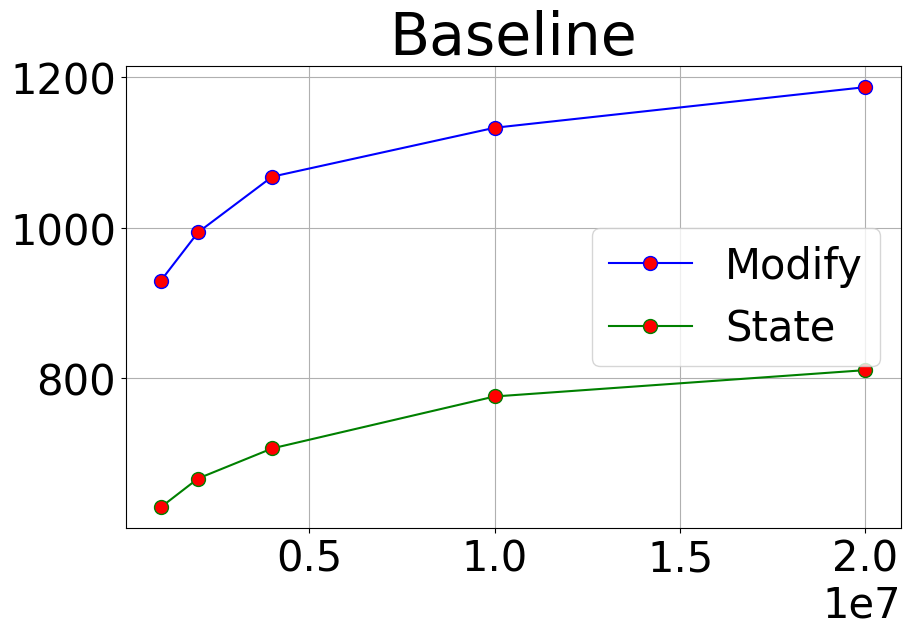

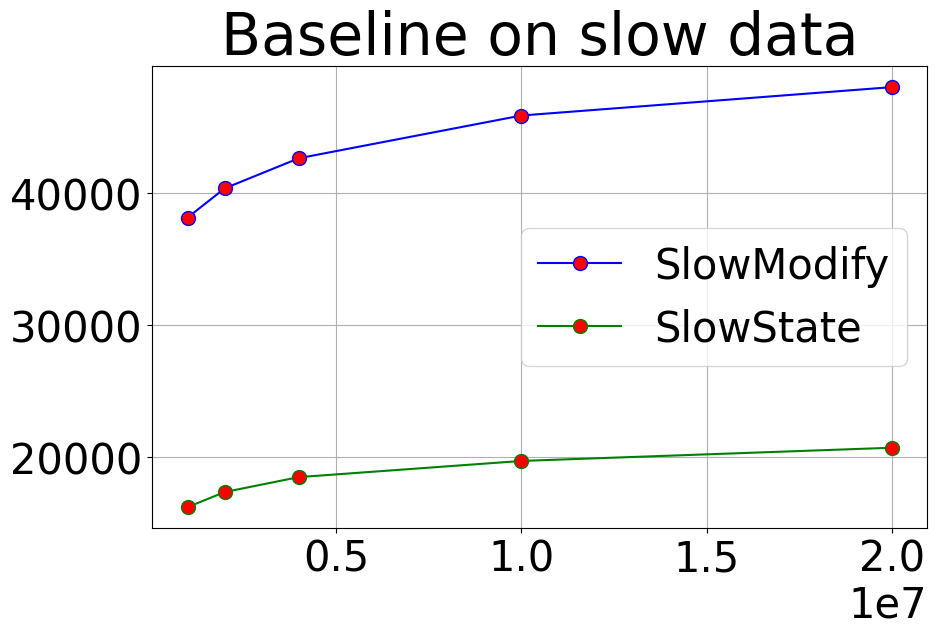

In [4]:
# ЭТАЛОН
title = "Baseline"
SetupPlot(title)
plt.plot(x, baseline_modify, label="Modify", color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, baseline_state, label="State", color='green', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "Baseline on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="SlowModify", color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, baseline_slow_state, label="SlowState", color='green', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

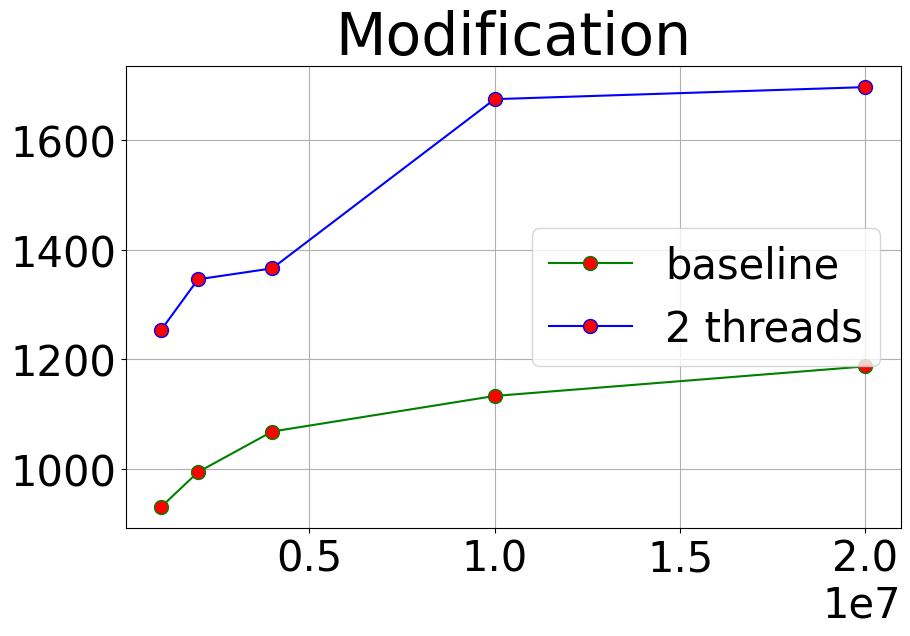

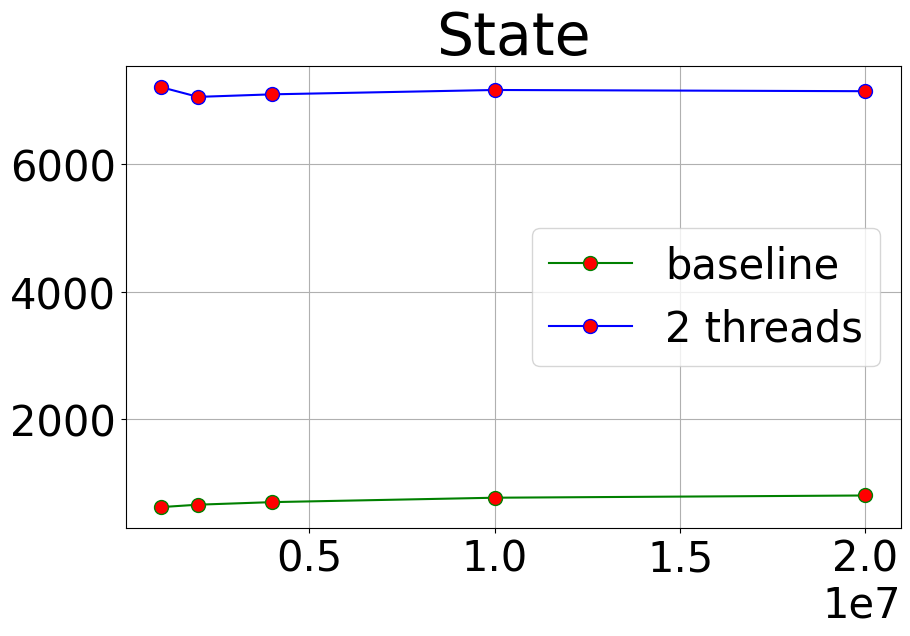

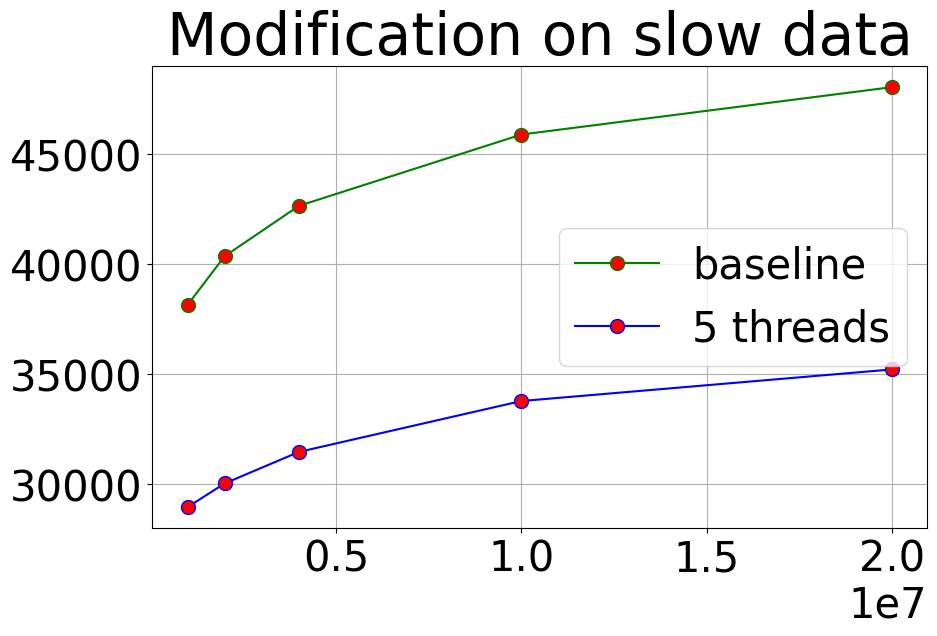

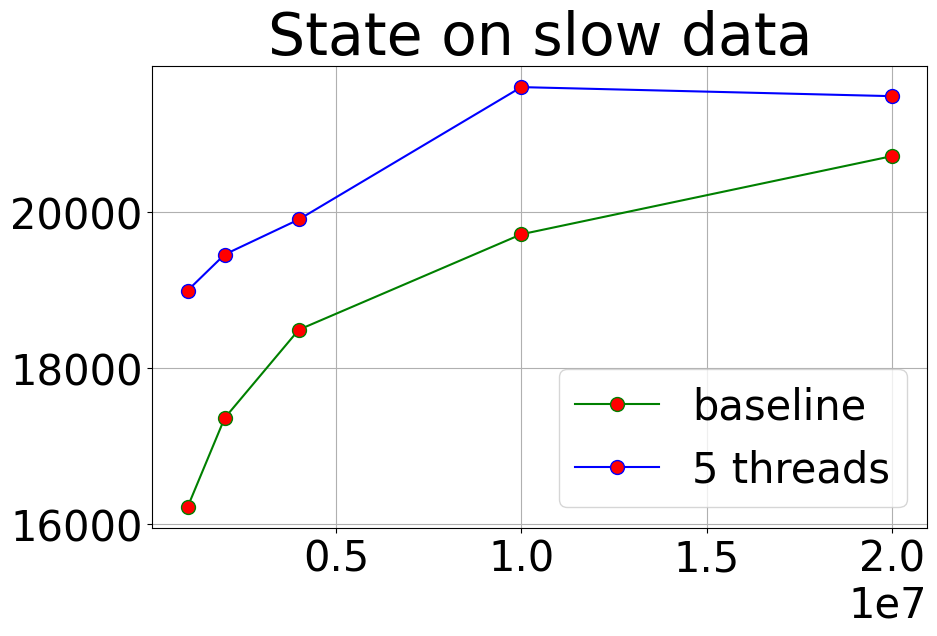

In [5]:
# ПЕРВАЯ ВЕРСИЯ
tree_v1_modify_2 = [1253, 1346, 1366, 1675, 1697, ]
tree_v1_state_2 = [7201, 7048, 7088, 7156, 7137, ]

title = "Modification"
SetupPlot(title)
plt.plot(x, baseline_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, tree_v1_modify_2, label="2 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "State"
SetupPlot(title)
plt.plot(x, baseline_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, tree_v1_state_2, label="2 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

tree_v1_slow_modify_5 = [28974, 30048, 31476, 33786, 35220, ]
tree_v1_slow_state_5 = [18989, 19451, 19900, 21596, 21480, ]

title = "Modification on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, tree_v1_slow_modify_5, label="5 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)


title = "State on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, tree_v1_slow_state_5, label="5 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

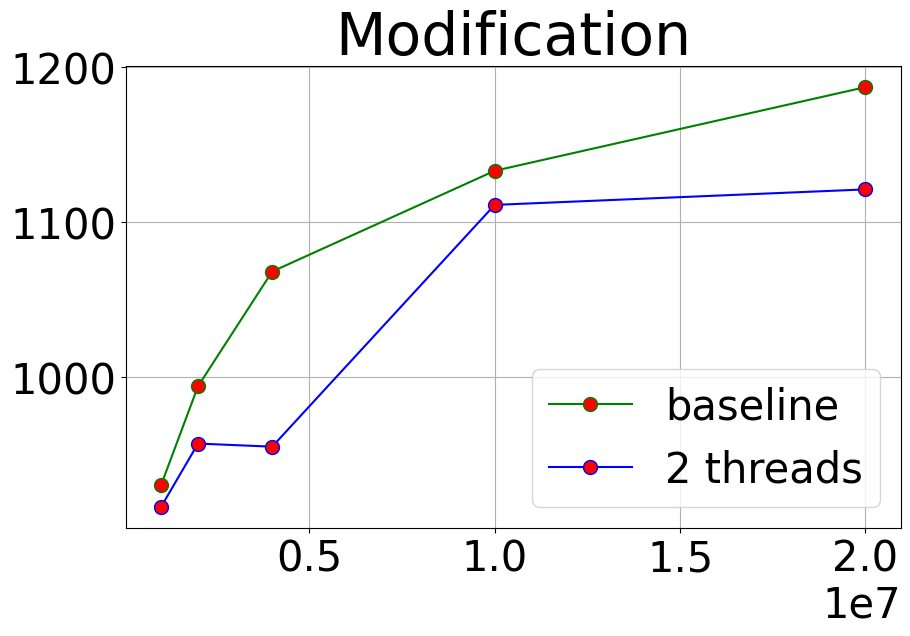

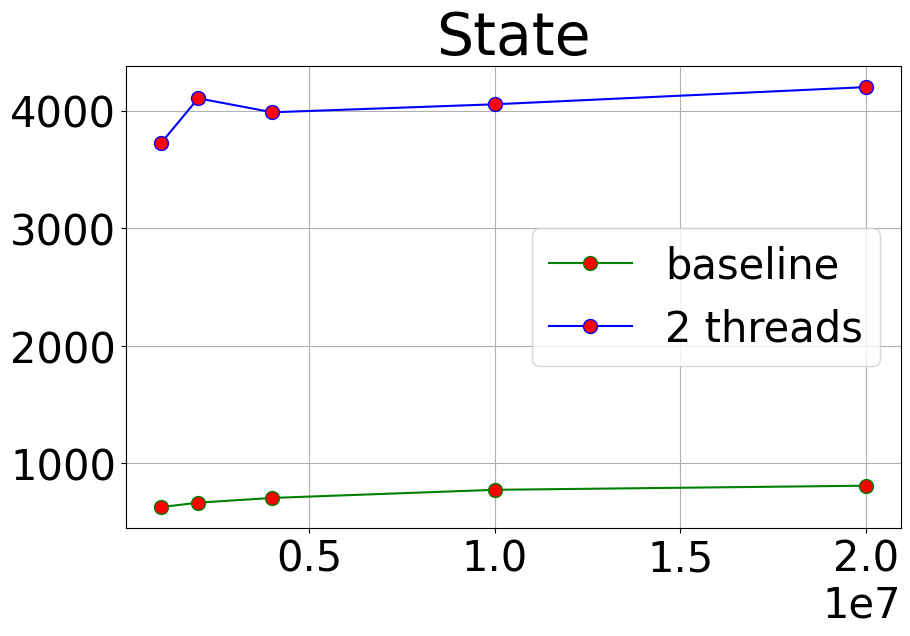

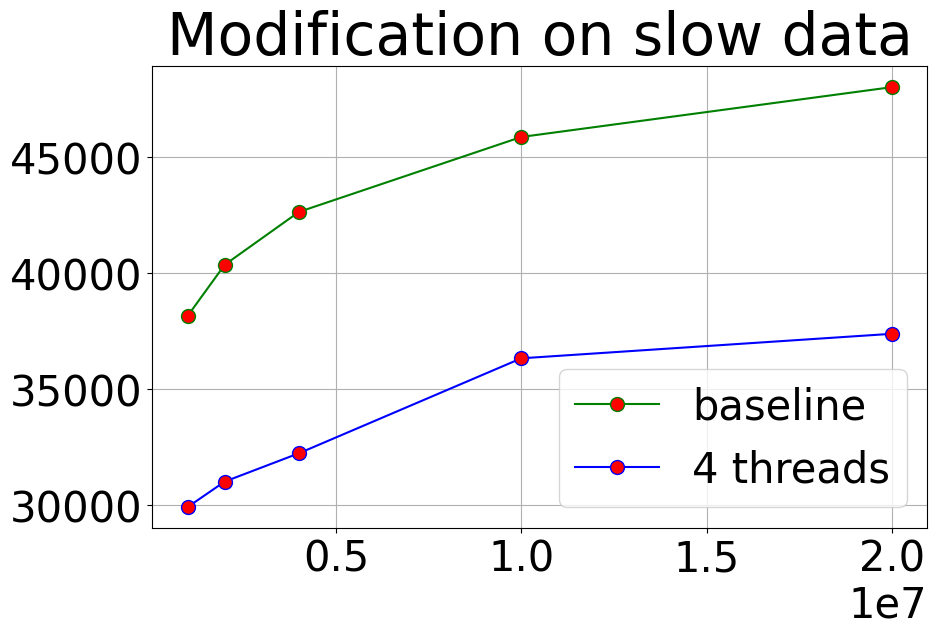

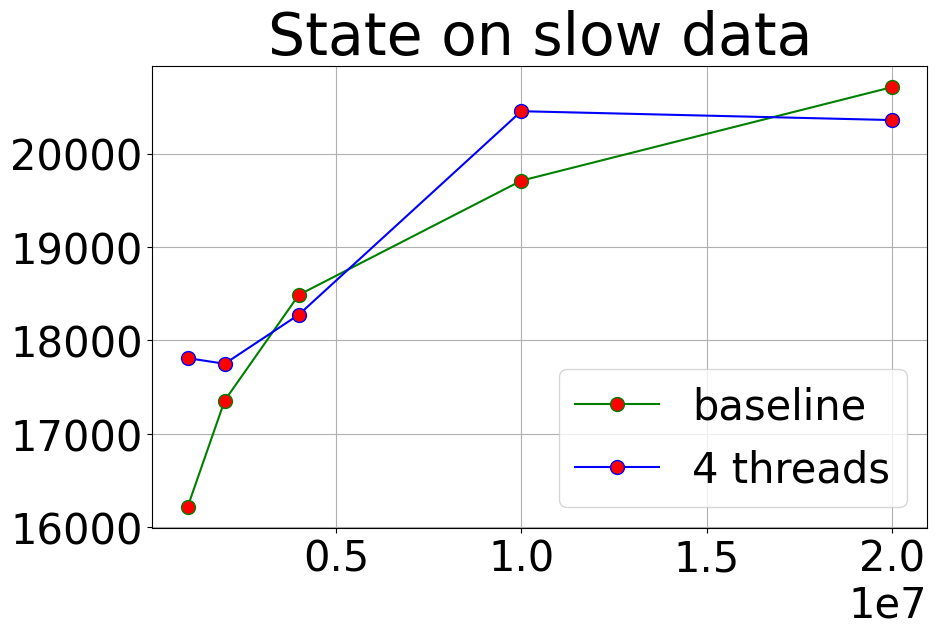

In [6]:
# ВТОРАЯ ВЕРСИЯ

# 2 threads
modify = [916, 957, 955, 1111, 1121, ]
state = [3723, 4104, 3985, 4053, 4199, ]

title = "Modification"
SetupPlot(title)
plt.plot(x, baseline_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, modify, label="2 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "State"
SetupPlot(title)
plt.plot(x, baseline_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, state, label="2 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

# 4 threads
slow_modify = [29898, 30999, 32220, 36321, 37379, ]
slow_state = [17810, 17749, 18275, 20454, 20359, ]

title = "Modification on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_modify, label="4 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)


title = "State on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_state, label="4 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

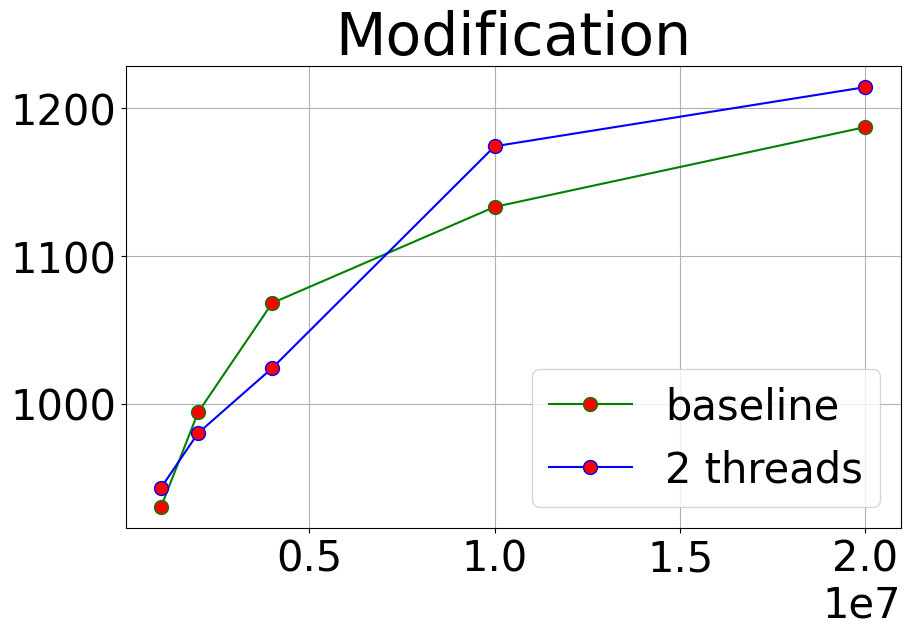

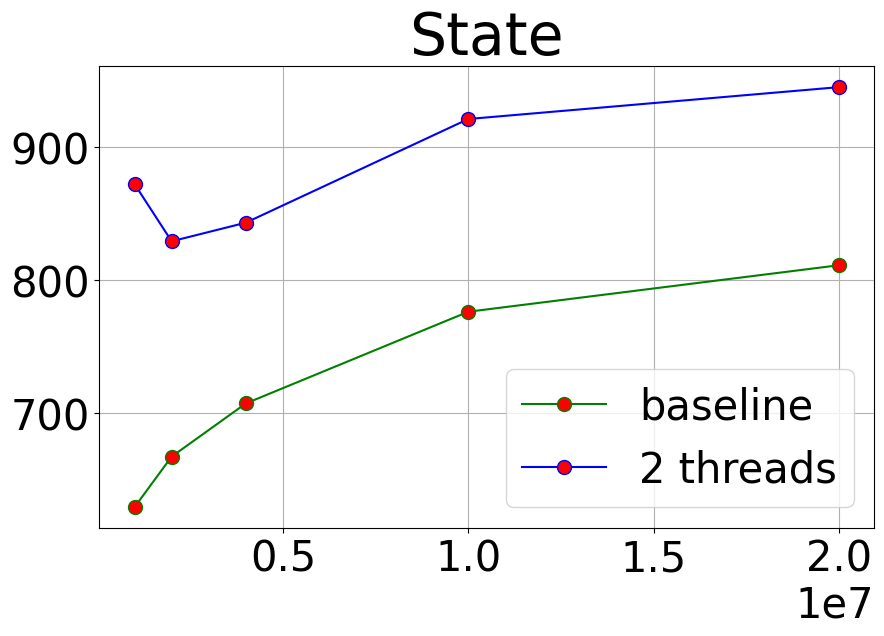

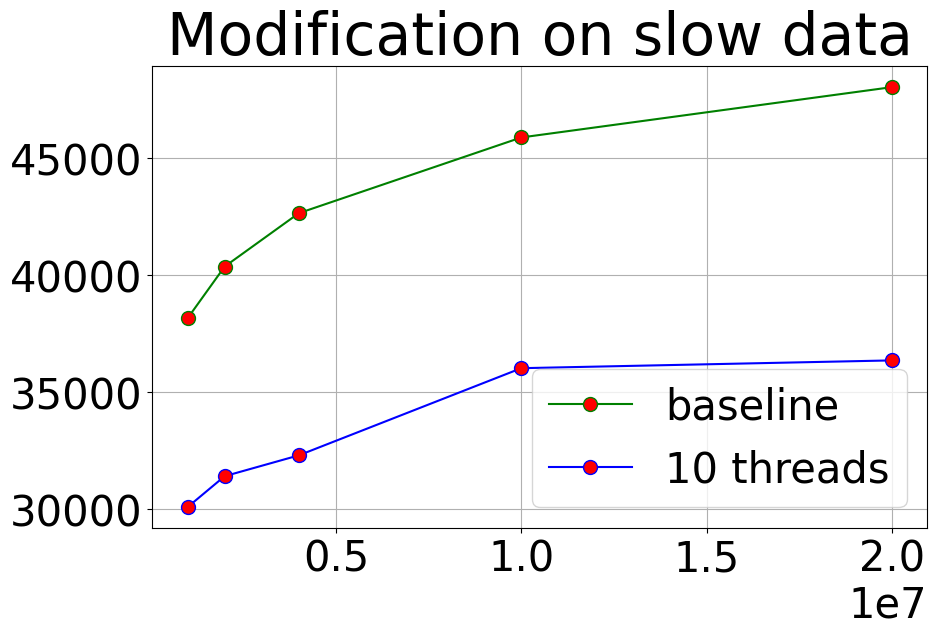

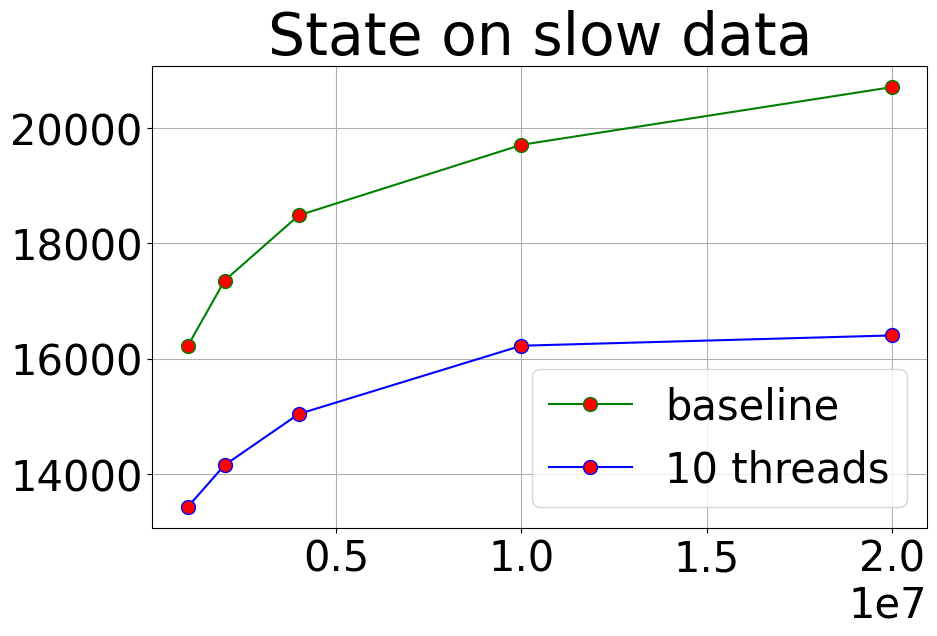

In [7]:
# ТРЕТЬЯ ВЕРСИЯ

# 2 threads
modify = [943, 980, 1024, 1174, 1214, ]
state = [872, 829, 843, 921, 945, ]

title = "Modification"
SetupPlot(title)
plt.plot(x, baseline_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, modify, label="2 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "State"
SetupPlot(title)
plt.plot(x, baseline_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, state, label="2 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

# 10 threads
slow_modify = [30075, 31397, 32288, 36013, 36346, ]
slow_state = [13422, 14152, 15039, 16223, 16402, ]

title = "Modification on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_modify, label="10 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)


title = "State on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_state, label="10 threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

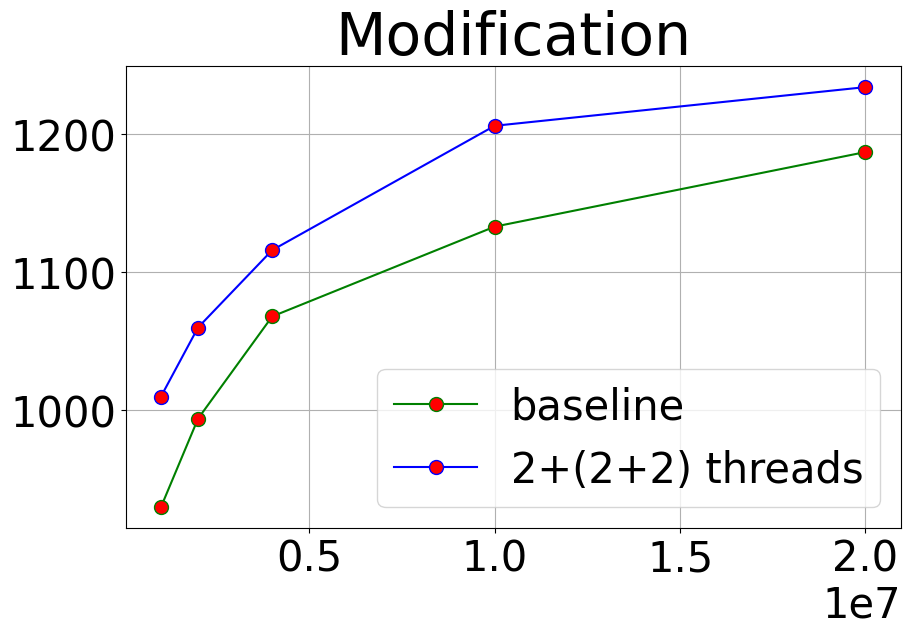

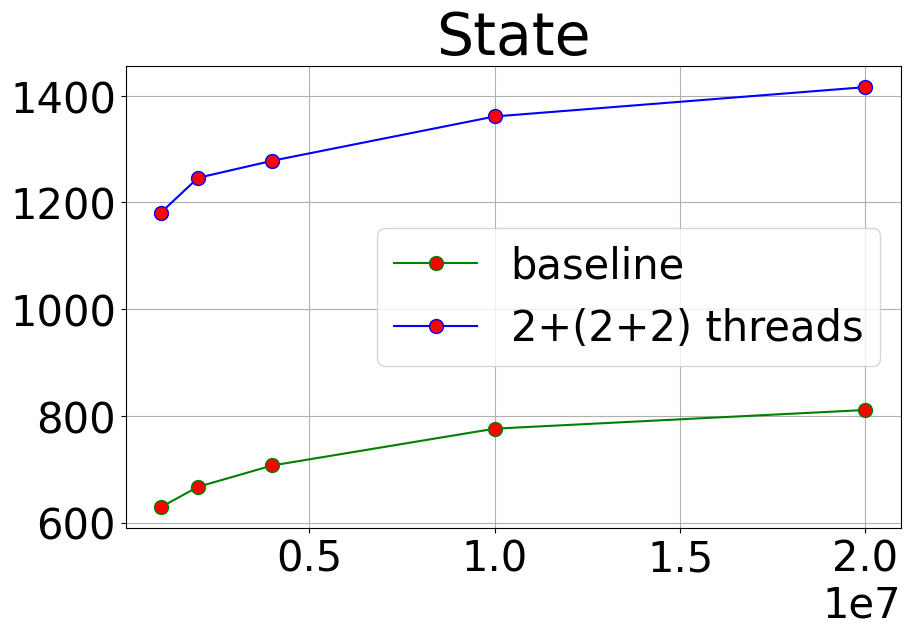

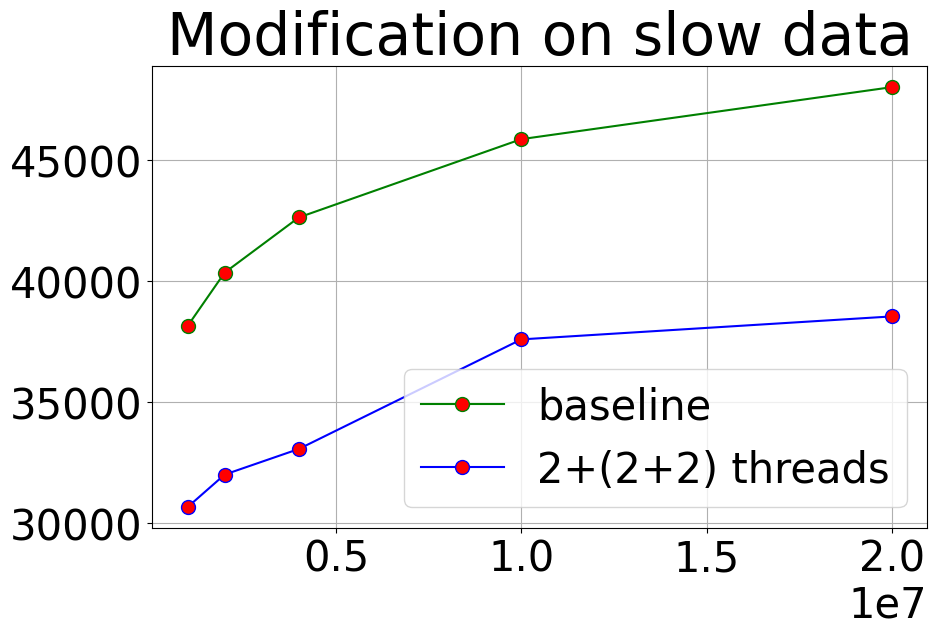

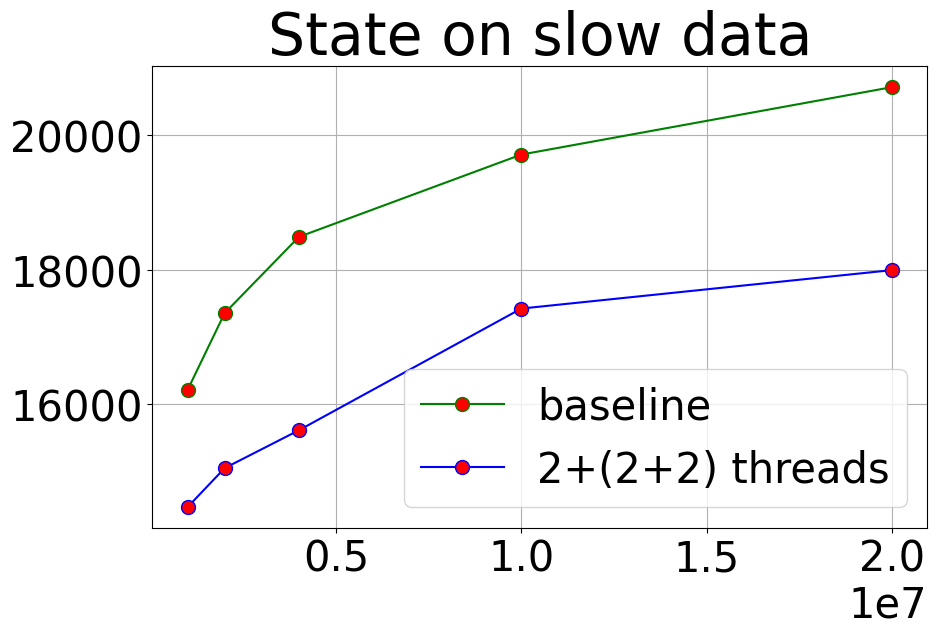

In [8]:
# ТРЕТЬЯ МОДИФИЦИРОВАННАЯ ВЕРСИЯ

# 2 + (2 + 2) threads
modify = [1010, 1060, 1116, 1206, 1234]
state = [1181, 1246, 1278, 1361, 1416]

title = "Modification"
SetupPlot(title)
plt.plot(x, baseline_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, modify, label="2+(2+2) threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "State"
SetupPlot(title)
plt.plot(x, baseline_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, state, label="2+(2+2) threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

# 2 + (2 + 2) threads
slow_modify = [30660, 32005, 33064, 37595, 38546]
slow_state = [14474, 15053, 15615, 17423, 17994]

title = "Modification on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_modify, label="2+(2+2) threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)


title = "State on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_state, label="2+(2+2) threads", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

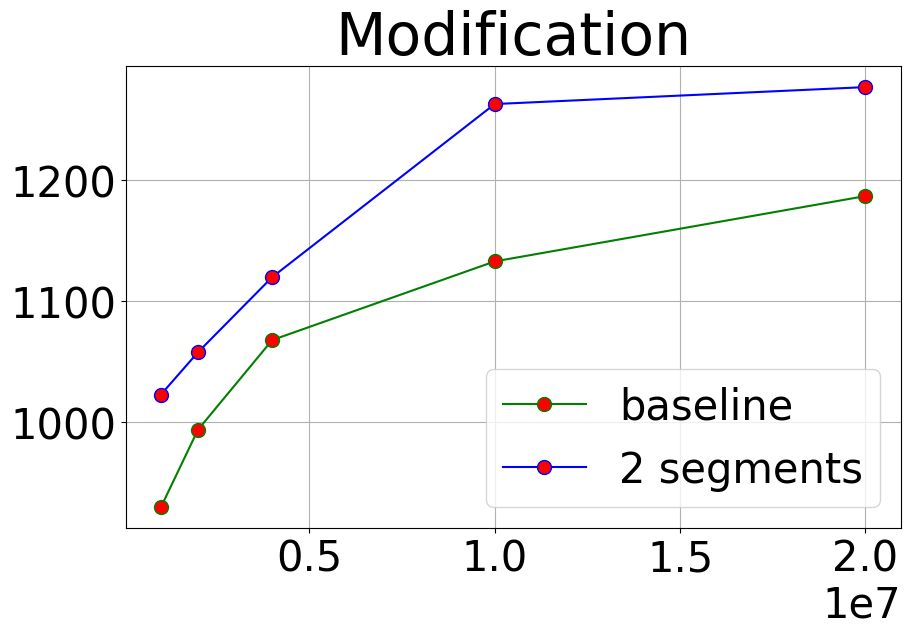

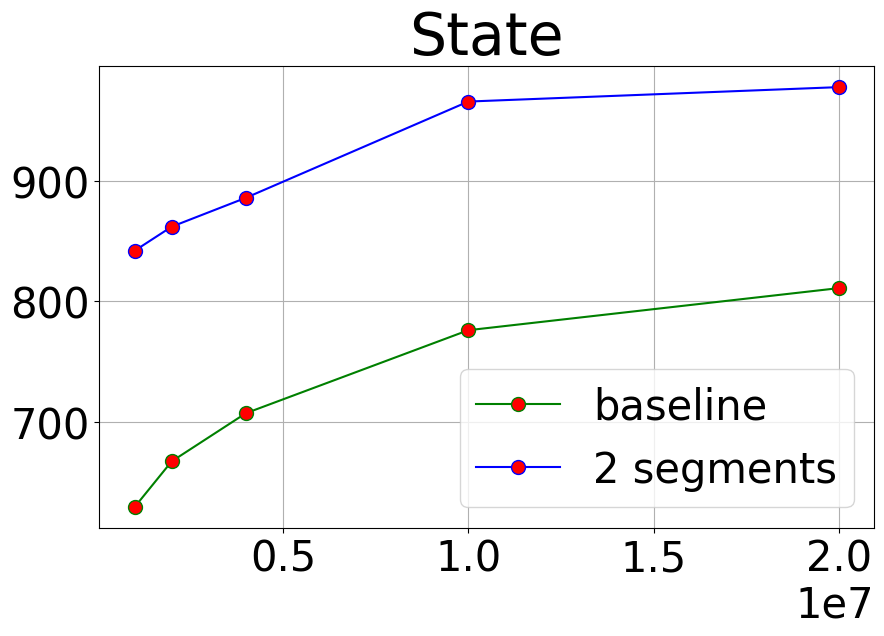

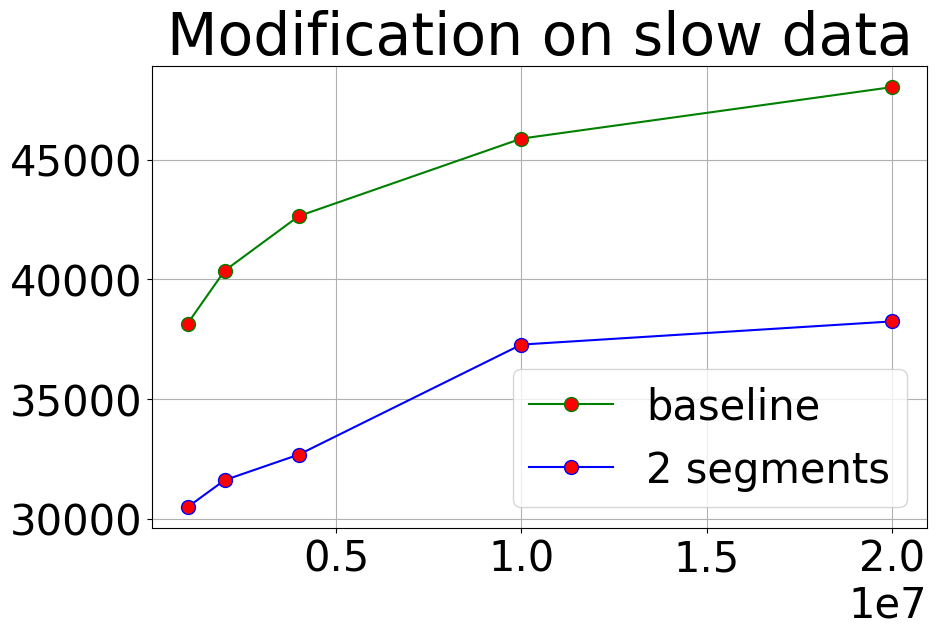

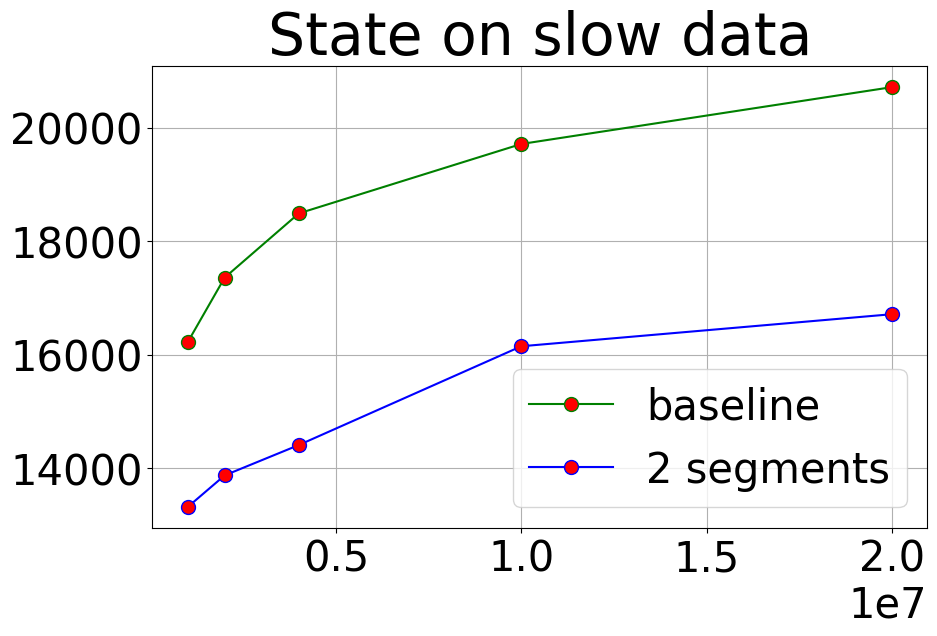

In [9]:
# ЧЕТВЕРТАЯ ВЕРСИЯ

# 2 segments
modify = [1023, 1058, 1120, 1263, 1277]
state = [842, 862, 886, 966, 978]

title = "Modification"
SetupPlot(title)
plt.plot(x, baseline_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, modify, label="2 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "State"
SetupPlot(title)
plt.plot(x, baseline_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, state, label="2 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

# 2 segments
slow_modify = [30477, 31604, 32672, 37268, 38237]
slow_state = [13312, 13871, 14406, 16146, 16711]

title = "Modification on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_modify, label="2 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)


title = "State on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_state, label="2 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

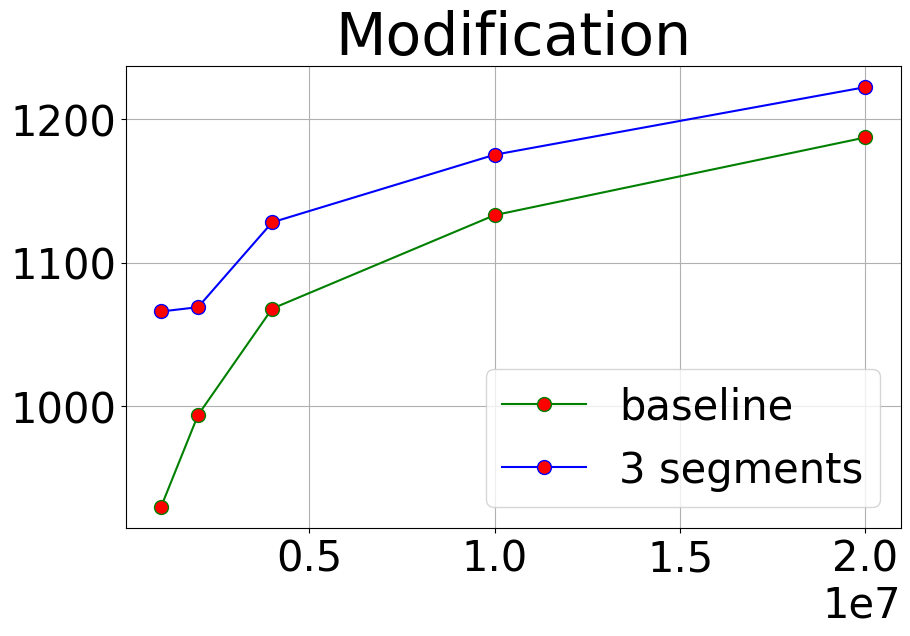

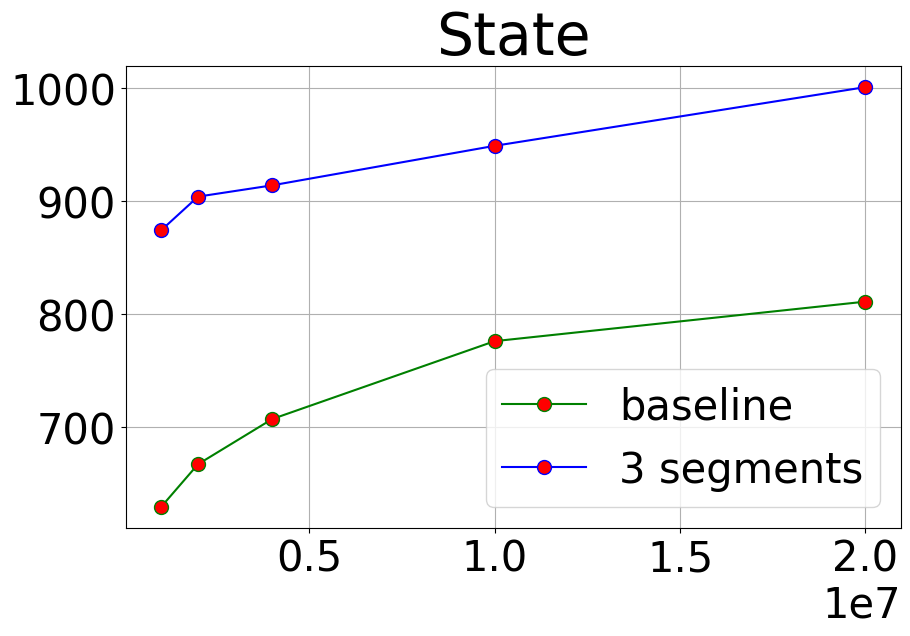

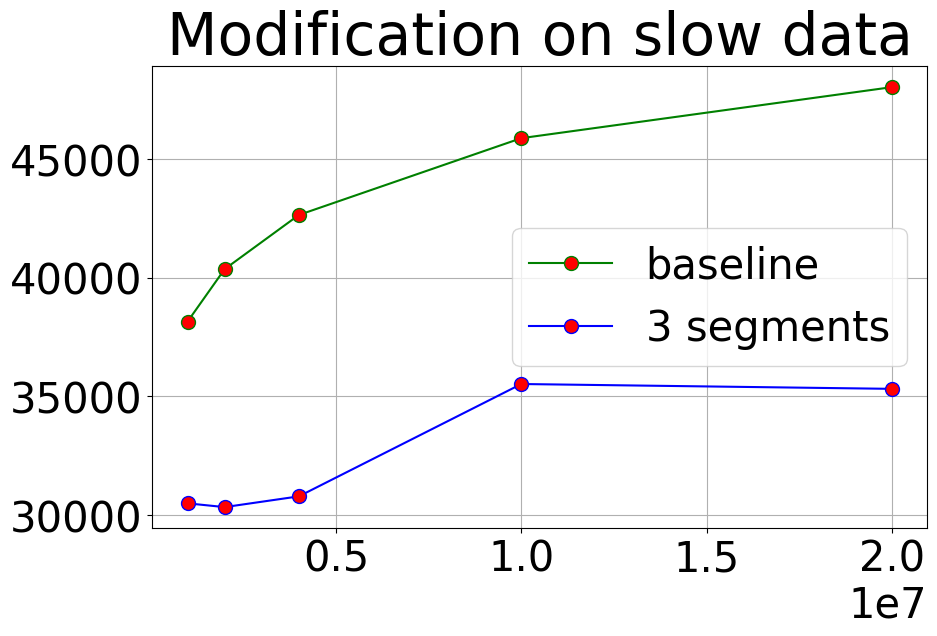

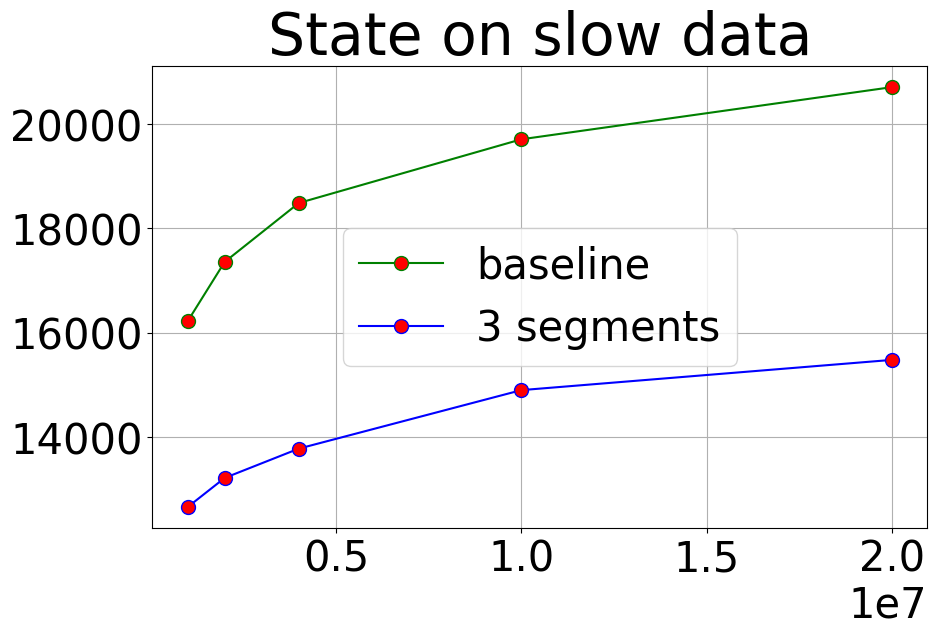

In [10]:
# ЧЕТВЕРТАЯ ВЕРСИЯ

# 3 segments
modify = [1066, 1069, 1128, 1175, 1222]
state = [874, 904, 914, 949, 1001]

title = "Modification"
SetupPlot(title)
plt.plot(x, baseline_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, modify, label="3 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

title = "State"
SetupPlot(title)
plt.plot(x, baseline_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, state, label="3 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)

# 3 segments
slow_modify = [30485, 30326, 30779, 35514, 35310]
slow_state = [12648, 13208, 13771, 14894, 15475]

title = "Modification on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_modify, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_modify, label="3 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)


title = "State on slow data"
SetupPlot(title)
plt.plot(x, baseline_slow_state, label="baseline", color='green', marker='o',markerfacecolor='red', markersize=10)
plt.plot(x, slow_state, label="3 segments", color='blue', marker='o',markerfacecolor='red', markersize=10)
ShowPlot(title)